# 1. Data Description

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
training = pd.read_csv('datasets/train.csv')
testing = pd.read_csv('datasets/test.csv')

In [5]:
training.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
testing.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Data Visualization

In [7]:
null_counts = training.isnull().sum() #count the number of null values
print(null_counts)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [8]:
training.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# Combined Data Analysis

In [9]:
df = training.append(testing)
df.head()

C:\Users\louis\AppData\Local\Temp\ipykernel_15052\3603507582.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = training.append(testing)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [11]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [13]:
#We are now going to fill in the null components
date = pd.Timestamp('2200-01-01')

for column in df:
    if df[column].dtype=="object":
        df[column].fillna("NA", inplace=True)
    if df[column].dtype=="int" or df[column].dtype=="float":
        df[column].fillna(df[column].mean(), inplace=True)
    if df[column].dtype=="datetime64[ns]":
        df[column].fillna(date, inplace=True)

In [14]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [15]:
df.isnull().sum() #just for checking

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

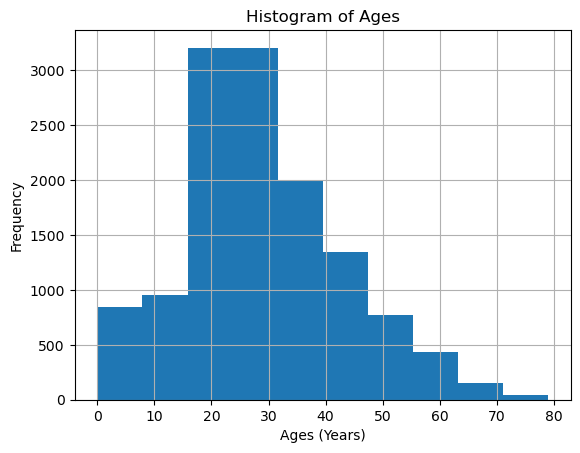

In [16]:
#Age Distribution
df['Age'].hist(bins=10)
plt.title("Histogram of Ages")
plt.xlabel('Ages (Years)')
plt.ylabel('Frequency')
plt.savefig('figures/age_distribution.png')

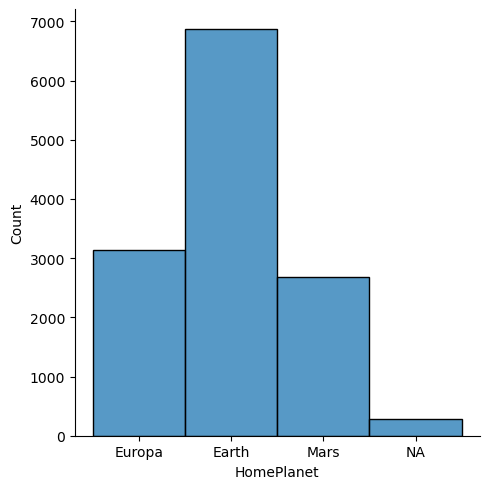

In [17]:
sns.displot(df['HomePlanet'])

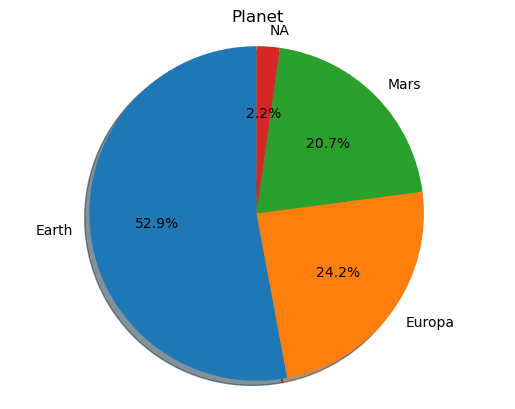

In [18]:
home_count = df['HomePlanet'].value_counts()
home_percent = home_count / len(training)
sizes = home_percent.values*100

labels = ["Earth", "Europa", "Mars",'NA']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Planet')
plt.savefig('figures/planet_pie_chart.png')
plt.show() 

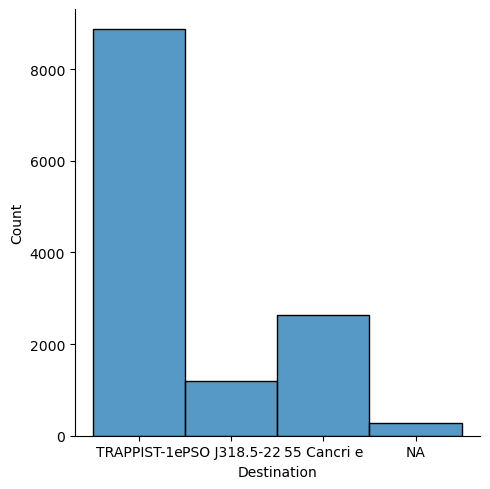

In [19]:
sns.displot(df['Destination'])

In [20]:
destination_count = df['Destination'].value_counts()
destination_count

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
NA                274
Name: Destination, dtype: int64

In [21]:
labels = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22",'NA']

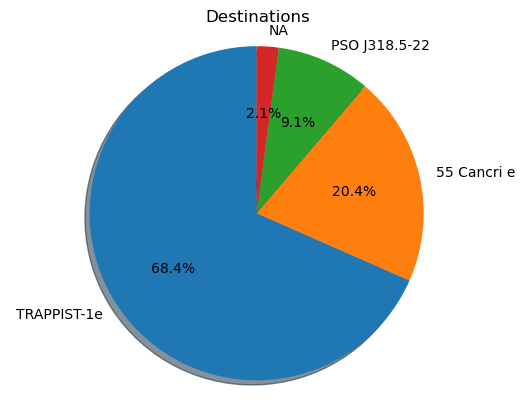

In [22]:
destination_percent = destination_count / len(df)
sizes = destination_percent.values*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Destinations')
plt.savefig('figures/destination_pie_chart.png')
plt.show() 

In [23]:
all_features = df.keys()
all_features

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [24]:
selected_features = all_features[1:-2:]
selected_features

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

<AxesSubplot:>

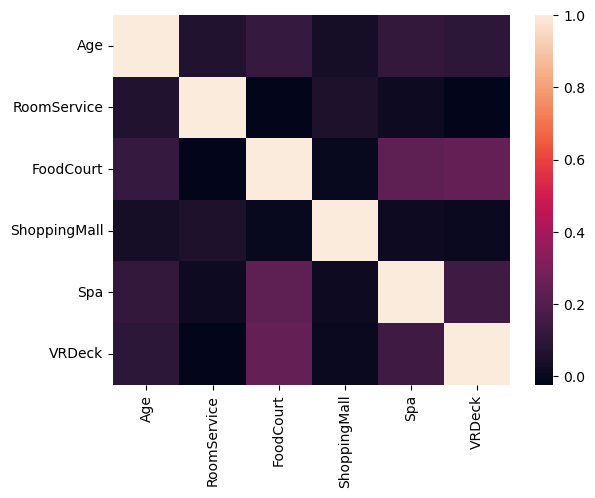

In [25]:
matrix = df[selected_features].corr()
sns.heatmap(matrix)

# Machine Learning Part

In [26]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NA
4273,9269_01,Earth,False,NA,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NA
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NA
4275,9273_01,Europa,False,D/297/P,NA,28.771969,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NA


In [51]:
#We are going to convert all the values in the dataframe into numeric values
def modify_df(df):
    df['Transported'].replace({False:0,True:1},inplace=True)
    df['HomePlanet'].replace({"Earth": 1, "Europa": 2, "Mars": 3, "not listed": 4},inplace=True)
    df['CryoSleep'].replace({False: 0, True: 1},inplace=True)
    df['Destination'].replace({"TRAPPIST-1e": 1, "55 Cancri e": 2, "PSO J318.5-22": 3, "not listed": 4},inplace=True)
    #df['Age_group'].replace({"young adult": 1, "child": 2, "middle age": 3, "pensioner": 4},inplace=True)
    df['VIP'].replace({False: 0, True: 1})
    #df['Room_Service_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
    #df['Food_Court_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
    #df['Shopping_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
    #df['Spa_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
    #df['VR_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
    return df

In [52]:
from sklearn.model_selection import train_test_split


df = modify_df(df)
train1  = df
train1['Transported'].replace({False:0,True:1},inplace=True)
train1.drop(index=df[df['Transported'] == 'NA'].index, inplace=True)
y = train1['Transported']
X = df[selected_features][:len(training)]
X_test = df[selected_features][len(training):]


In [53]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4277,4557_01,1,0,E/286/P,1,17.000000,False,0.000000,656.0,295.000000,0.0,35.0,Dwin Mirez,0
4278,4558_01,2,0,C/167/S,2,54.000000,False,0.000000,559.0,0.000000,15238.0,2799.0,Wezna Baleful,0
4279,4559_01,1,0,F/854/S,1,25.000000,False,222.897852,205.0,174.906033,0.0,549.0,Elene Rasmussony,1
4280,4560_01,1,0,G/744/S,1,28.771969,False,0.000000,57.0,851.000000,0.0,0.0,Daven Monsoney,1
4281,4561_01,2,0,C/168/S,2,45.000000,False,0.000000,496.0,0.000000,1940.0,4195.0,Alrair Unhearfus,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,2,0,A/98/P,2,41.000000,True,0.000000,6819.0,0.000000,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,1,1,G/1499/S,3,18.000000,False,0.000000,0.0,0.000000,0.0,0.0,Kurta Mondalley,0
8690,9279_01,1,0,G/1500/S,1,26.000000,False,0.000000,0.0,1872.000000,1.0,0.0,Fayey Connon,1
8691,9280_01,2,0,E/608/S,2,32.000000,False,0.000000,1049.0,0.000000,353.0,3235.0,Celeon Hontichre,0


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,shuffle=True)

In [55]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7143,2,1,B/250/P,2,35.000000,False,0.0,0.0,0.000000,0.0,0.0
6306,3,0,F/1279/S,1,31.000000,False,1002.0,0.0,174.906033,0.0,0.0
8153,2,0,A/104/S,1,33.000000,True,0.0,3076.0,0.000000,3.0,994.0
6536,1,1,G/1123/S,1,16.000000,False,0.0,0.0,0.000000,0.0,0.0
7784,1,0,G/1341/S,1,30.000000,False,467.0,0.0,0.000000,0.0,287.0
...,...,...,...,...,...,...,...,...,...,...,...
6219,3,1,E/438/S,1,26.000000,False,0.0,0.0,0.000000,0.0,0.0
6032,1,1,G/1034/S,3,16.000000,False,0.0,0.0,0.000000,0.0,0.0
8375,1,1,G/1453/P,1,21.000000,False,0.0,0.0,0.000000,0.0,0.0
6577,1,0,G/1124/P,1,22.000000,False,245.0,0.0,0.000000,661.0,1.0


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, C=10).fit(X_train, y_train)
print(model.score(X_train, y_train))

ValueError: could not convert string to float: 'NA'

In [57]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7143,2,1,B/250/P,2,35.000000,False,0.0,0.0,0.000000,0.0,0.0
6306,3,0,F/1279/S,1,31.000000,False,1002.0,0.0,174.906033,0.0,0.0
8153,2,0,A/104/S,1,33.000000,True,0.0,3076.0,0.000000,3.0,994.0
6536,1,1,G/1123/S,1,16.000000,False,0.0,0.0,0.000000,0.0,0.0
7784,1,0,G/1341/S,1,30.000000,False,467.0,0.0,0.000000,0.0,287.0
...,...,...,...,...,...,...,...,...,...,...,...
6219,3,1,E/438/S,1,26.000000,False,0.0,0.0,0.000000,0.0,0.0
6032,1,1,G/1034/S,3,16.000000,False,0.0,0.0,0.000000,0.0,0.0
8375,1,1,G/1453/P,1,21.000000,False,0.0,0.0,0.000000,0.0,0.0
6577,1,0,G/1124/P,1,22.000000,False,245.0,0.0,0.000000,661.0,1.0
